# Ejercicio 11 - guía 7

Una empresa de tecnología quiere comparar el tiempo de respuesta de dos versiones de su software de gestión: una versión antigua y una versión optimizada. Se midió el tiempo de respuesta (en segundos) de una tarea específica realizada por el software en diferentes computadoras y la idea es comparar el tiempo promedio $\mu_0$ de la versión antigua con el tiempo promedio $\mu_1$ de la versión optimizada. Para la versión antigua se midió en 32 computadoras y se obtuvo un promedio muestral de 1.013 segundos y un desvío estándar muestral de 0.24. Para las 36 computadoras con la versión moderna, el promedio muestral fue de 1.173 y el desvío estándar muestral de 0.20.

## a) 
Asumiendo que los tiempos de respuesta del software antiguo fueron tomados de manera aleatoria de una distribución normal con media $\mu_0$ y varianza 𝜎^2_0 ¿cuál es la posterior de $\mu_0$?. De manera análoga usar las mediciones del software optimizado para obtener la distribución posterior de 𝜇1. Asumir un prior uniforme en (𝜇0, 𝜇1, log 𝜎^2_0 , log 𝜎^2_1 ).


### Desarrollo

Planteo los datos que tengo:

* Para la versión antigua, tenemos que $X_0 \sim N(\mu_0, \sigma_0^2)$ con $\mu_0$ desconocido.

* Para la versión optimizada, tenemos que $X_1 \sim N(\mu_1, \sigma_1^2)$ con $\mu_1$ desconocido.

* Asumimos un prior uniforme en $(\mu_0, \mu_1, \log \sigma_0^2, \log \sigma_1^2)$

Para el cálculo de la posterior de $\mu_0$:

* Sabemos que la muestra de la versión antigua tiene un promedio muestral $\bar{x}_0 = 1.013$, un desvío estándar $s_0 = 0.24$ y un tamaño $n_0 = 32$.

* Dado un prior uniforme y considerando que $\sigma_0^2$ es un parámetro de molestia, la posterior de $\mu_0$ dado $X_0$ sigue una distribución t-Student con $n_0 - 1$ grados de    libertad, centrada en $\bar{x}_0$ y con varianza ajustada $\frac{s_0^2}{n_0}$:

$$
\mu_0 \mid X_0 \sim t_{n_0 - 1} \left(\bar{x}_0, \frac{s_0^2}{n_0}\right)
$$

Para el cálculo de la posterior de $\mu_1$:

* De manera similar, para la versión optimizada, tenemos $\bar{x}_1 = 1.173$, $s_1 = 0.20$ y $n_1 = 36$.

* La posterior de $\mu_1$ dado $X_1$ también sigue una distribución t-Student con $n_1 - 1$ grados de libertad, centrada en $\bar{x}_1$ y con varianza ajustada $\frac{s_1^2}{n_1}$:

$$
\mu_1 \mid X_1 \sim t_{n_1 - 1} \left(\bar{x}_1, \frac{s_1^2}{n_1}\right)
$$



## b)
Obtener la distribución posterior de la diferencia 𝜇1 − 𝜇0 tomando muestras de las distribuciones independientes obtenidas en el item anterior. Graficar un historgrama de las muestras
de 𝜇1 − 𝜇0 y dar un intervalo de probabilidad posterior de 95%. ¿Qué conclusiones se sacan?

### Desarrollo)

Primero obtengo las muestras de las distribuciones obtenidas en el ítem anterior:

In [ ]:
import numpy as np
from scipy.stats import t

# Versión antigua
muestra_0 = 32
x_raya_0 = 1.013
s_0 = 0.24

# Versión optimizada
muestra_1 = 36
x_raya_1 = 1.173
s_1 = 0.20

# Muestras de la posterior para mu_0 (Ver que es como "desnormalizar" porque despejo a mu0)
grados_libertad_0 = muestra_0 - 1
mu0_samples = x_raya_0 + (s_0 / np.sqrt(muestra_0)) * np.random.standard_t(df=grados_libertad_0, size=10000)

# Muestras de la posterior para mu_1 (Ver que es como "desnormalizar" porque despejo a mu1)
grados_libertad_1 = muestra_1 - 1
mu1_samples = x_raya_1 + (s_1 / np.sqrt(muestra_1)) * np.random.standard_t(df=grados_libertad_1, size=10000)


Obtengo una distribución de la diferencia entre las muestras junto con su intervalo de confianza:

In [ ]:
mu_diff_samples_t = mu1_samples - mu0_samples

# Intervalo de confianza del 95% 
low_t = np.percentile(mu_diff_samples_t, 2.5)
up_t = np.percentile(mu_diff_samples_t, 97.5)

Y hago el histograma de la distribución:

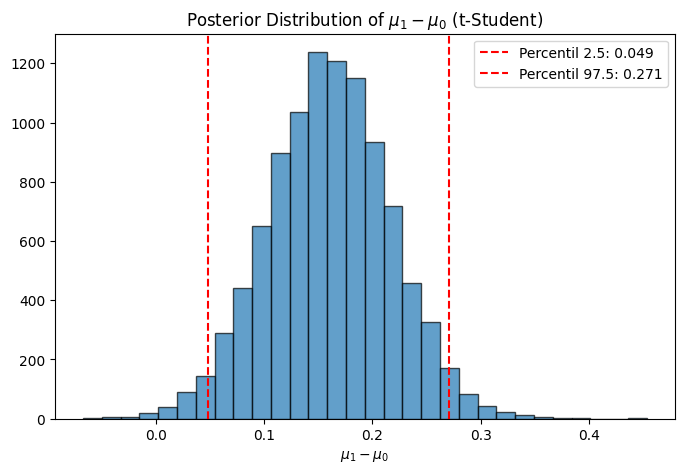

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(mu_diff_samples_t, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(low_t, color='red', linestyle='--', label=f'Percentil 2.5: {low_t:.3f}')
plt.axvline(up_t, color='red', linestyle='--', label=f'Percentil 97.5: {up_t:.3f}')
plt.xlabel(r'$\mu_1 - \mu_0$')
plt.title(r'Posterior Distribution of $\mu_1 - \mu_0$ (t-Student)')
plt.legend()
plt.show()
